<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [201]:
# pip install snowballstemmer

In [202]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [203]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [204]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot() 
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [205]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

import requests
import pandas as pd
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)

if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
else:
    print("Failed to fetch data from the URL")



In [206]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [207]:
# URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
# X = pd.read_csv(text2)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL2)

if response.status_code == 200:
    X = pd.read_csv(io.StringIO(response.text))
else:
    print("Failed to fetch data from the URL")


In [208]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [209]:
Y = data['Class'].to_numpy()
Y


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [210]:
# students get this 
scaler  = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [212]:
X_test


array([[ 0.13472338, -1.23271672, -0.65391284, ..., -0.83553169,
        -0.51730613,  0.51730613],
       [ 1.25100281,  1.99100483,  1.83279796, ...,  1.19684269,
        -0.51730613,  0.51730613],
       [ 1.40497238, -0.47658801, -0.65391284, ..., -0.83553169,
        -0.51730613,  0.51730613],
       ...,
       [-0.6351245 , -0.17242292,  0.17499076, ...,  1.19684269,
        -0.51730613,  0.51730613],
       [-1.2894952 , -0.79467615, -0.65391284, ..., -0.83553169,
        -0.51730613,  0.51730613],
       [-0.82758647, -0.32236346, -0.65391284, ..., -0.83553169,
        -0.51730613,  0.51730613]])

In [213]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [214]:
lr_parameters ={'C':[0.01,0.1,1],
            'penalty':['l2'],
            'solver':['lbfgs']} # l1 lasso l2 ridge

In [215]:
lr = LogisticRegression()


logreg_cv = GridSearchCV(lr, lr_parameters, cv=10)
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [216]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
lr_train_accuracy = logreg_cv.best_score_
print("accuracy :",lr_train_accuracy)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [217]:
# Calculate accuracy on the test data
lr_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", lr_accuracy)


Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:


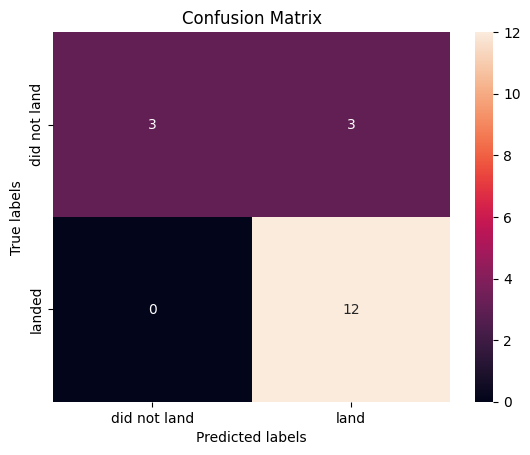

In [218]:
lr_yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,lr_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [219]:
svc_parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
            'C': np.logspace(-3, 3, 5),
            'gamma':np.logspace(-3, 3, 5)}


In [220]:
from sklearn.svm import SVC
svm =svm = SVC()

# Create a GridSearchCV object
svm_cv = GridSearchCV(estimator=svm, param_grid=svc_parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Create a GridSearchCV object
svm_cv = GridSearchCV(estimator=svm, param_grid=svc_parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [221]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
svm_trian_accuracy = svm_cv.best_score_
print("accuracy :",svm_trian_accuracy)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [222]:
# Calculate the accuracy on the test data
svm_accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", svm_accuracy)


Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix


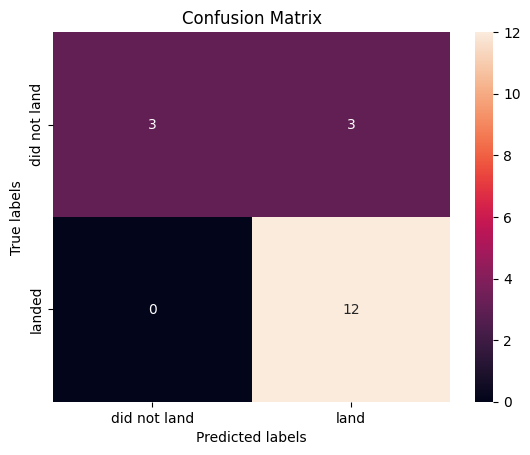

In [223]:
svm_yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [224]:
tree_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'], 
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [225]:
tree_cv = GridSearchCV(tree, tree_parameters, cv=10)
tree_cv.fit(X_train, Y_train)


C:\Users\NimZee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NimZee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NimZee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [226]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)

tree_train_Accuacy = tree_cv.best_score_
print("accuracy :",tree_train_Accuacy)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8607142857142858


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [227]:
# Calculate the accuracy on the test data
tree_accuracy = tree_cv.score(X_test, Y_test)
tree_accuracy

0.8888888888888888

We can plot the confusion matrix


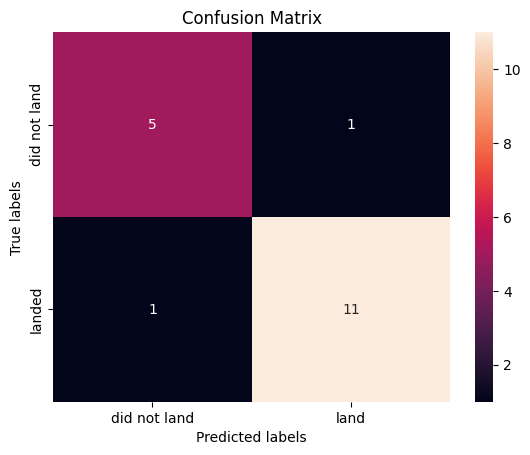

In [228]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,tree_yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [229]:
knn_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1,2]}

KNN = KNeighborsClassifier()

In [230]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=knn_parameters, cv=10)

knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [231]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
knn_trian_accuracy=  knn_cv.best_score_
print("accuracy :",knn_trian_accuracy)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [232]:
# Calculate the accuracy of knn_cv on the test data
knn_accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy of KNN on test data:", knn_accuracy)


Accuracy of KNN on test data: 0.8333333333333334


We can plot the confusion matrix


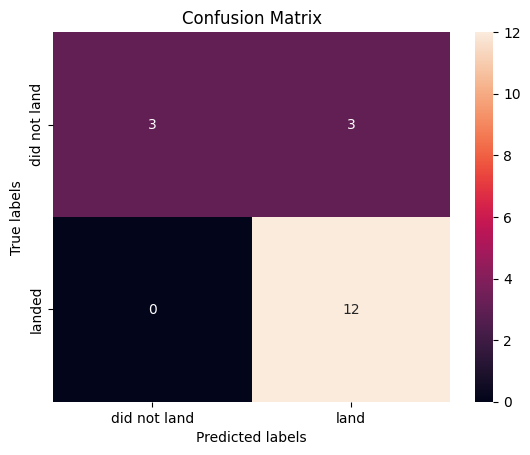

In [233]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)

## TASK  12


Find the method performs best:


In [234]:
# Dictionary to store accuracies of each model
Test_accuracies = {
    'Logistic Regression': lr_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Decision Tree': tree_accuracy,
    'K Nearest Neighbors': knn_accuracy
}
Train_accuracies = {
    'Logistic Regression': lr_train_accuracy,
    'Support Vector Machine': svm_trian_accuracy,
    'Decision Tree': tree_train_Accuacy,
    'K Nearest Neighbors': knn_trian_accuracy
}


# Find the best performing method
best_method = max(Test_accuracies, key=Test_accuracies.get)
best_accuracy = Test_accuracies[best_method]

# Print the results
print("Best performing method:", best_method)
print("Accuracy of the best performing method:", best_accuracy)


Best performing method: Decision Tree
Accuracy of the best performing method: 0.8888888888888888


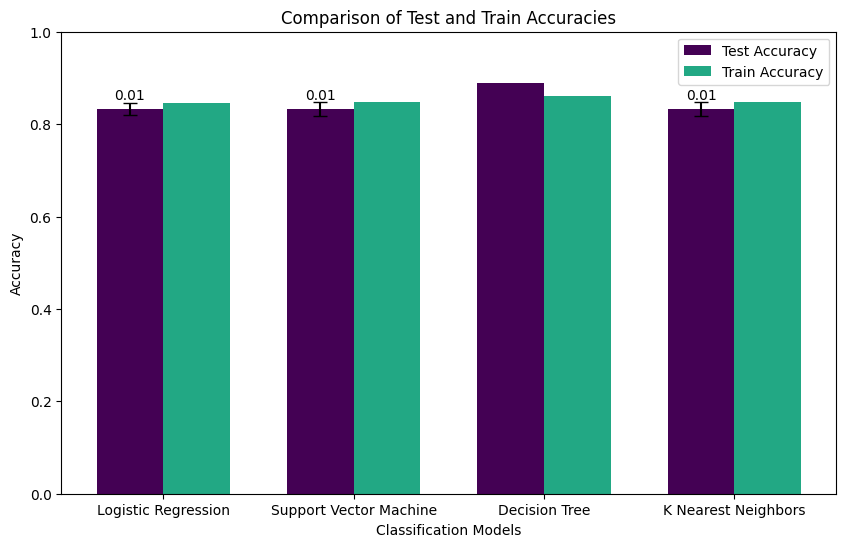

In [235]:
import matplotlib.pyplot as plt
import numpy as np

# List of model names
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors']

# Test and train accuracy scores for each model
test_accuracies = [Test_accuracies[model] for model in models]
train_accuracies = [Train_accuracies[model] for model in models]

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Calculate the difference between test and train accuracies
accuracy_diff = [abs(test_accuracies[i] - train_accuracies[i]) for i in range(len(models))]

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plot bars for test accuracies
plt.bar(r1, test_accuracies, color='#440154ff' , width=bar_width, label='Test Accuracy')

# Plot bars for train accuracies
plt.bar(r2, train_accuracies, color='#22a884FF', width=bar_width, label='Train Accuracy')

# Add error bars and annotations for test accuracies
for i in range(len(models)):
    if test_accuracies[i] < train_accuracies[i]:
        plt.errorbar(r1[i], test_accuracies[i], yerr=accuracy_diff[i], fmt='none', capsize=5, color='black')
        plt.text(r1[i], test_accuracies[i] + 0.02, f'{accuracy_diff[i]:.2f}', ha='center')

# Adding labels
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Test and Train Accuracies')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy score
plt.legend()
plt.show()


In [236]:
# Print the accuracies of all the models
print("Accuracies of all the models:")
for model, accuracy in Test_accuracies.items():
    print(f"{model}: {accuracy:.2f}")

# Find the best performing method
best_method = max(Test_accuracies, key=Test_accuracies.get)
best_accuracy = Test_accuracies[best_method]

# Find the worst performing method
worst_method = min(Test_accuracies, key=Test_accuracies.get)
worst_accuracy = Test_accuracies[worst_method]

# Print the results
print("\nBest performing method:", best_method)
print("Accuracy of the best performing method:", best_accuracy)

print("\nWorst performing method:", worst_method)
print("Accuracy of the worst performing method:", worst_accuracy)


Accuracies of all the models:
Logistic Regression: 0.83
Support Vector Machine: 0.83
Decision Tree: 0.89
K Nearest Neighbors: 0.83

Best performing method: Decision Tree
Accuracy of the best performing method: 0.8888888888888888

Worst performing method: Logistic Regression
Accuracy of the worst performing method: 0.8333333333333334


In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors']

# List of accuracy scores for each model (replace these with actual accuracy scores)
accuracy_scores = [lr_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]

# List of best hyperparameters for each model (replace these with actual hyperparameters)
best_hyperparameters = [{'C': 1.0}, {'C': 1.0, 'kernel': 'rbf'}, {'max_depth': 5}, {'n_neighbors': 5}]

# Create a DataFrame for storing model details
data = {'Model': models, 'Accuracy': accuracy_scores, 'Hyperparameters': best_hyperparameters}
df = pd.DataFrame(data)

# Sort the DataFrame based on accuracy scores
df_sorted = df.sort_values(by='Accuracy', ascending=False)



# Print the best performing model and its hyperparameters
best_model = df_sorted.iloc[0]
print("Best performing model:", best_model['Model'])
print("Accuracy of the best performing model:", best_model['Accuracy'])
print("Hyperparameters of the best performing model:", best_model['Hyperparameters'])

# Print the worst performing model and its hyperparameters
worst_model = df_sorted.iloc[-1]
print("\nWorst performing model:", worst_model['Model'])
print("Accuracy of the worst performing model:", worst_model['Accuracy'])
print("Hyperparameters of the worst performing model:", worst_model['Hyperparameters'])


Best performing model: Decision Tree
Accuracy of the best performing model: 0.8888888888888888
Hyperparameters of the best performing model: {'max_depth': 5}

Worst performing model: K-Nearest Neighbors
Accuracy of the worst performing model: 0.8333333333333334
Hyperparameters of the worst performing model: {'n_neighbors': 5}


In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors']

# List of accuracy scores for each model (replace these with actual accuracy scores)
accuracy_scores = [lr_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]

# List of best hyperparameters for each model (replace these with actual hyperparameters)
best_hyperparameters = [{'C': 1.0}, {'C': 1.0, 'kernel': 'rbf'}, {'max_depth': 5}, {'n_neighbors': 5}]

# Create a DataFrame for storing model details
data = {'Model': models, 'Accuracy': accuracy_scores, 'Hyperparameters': best_hyperparameters}
df = pd.DataFrame(data)

# Sort the DataFrame based on accuracy scores
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# Print the best performing model and its hyperparameters
best_model = df_sorted.iloc[0]
print("Best performing model:", best_model['Model'])
print("Accuracy of the best performing model:", best_model['Accuracy'])
print("Hyperparameters of the best performing model:", best_model['Hyperparameters'])

# Print the worst performing model and its hyperparameters
worst_model = df_sorted.iloc[-1]
print("\nWorst performing model:", worst_model['Model'])
print("Accuracy of the worst performing model:", worst_model['Accuracy'])
print("Hyperparameters of the worst performing model:", worst_model['Hyperparameters'])


Best performing model: Decision Tree
Accuracy of the best performing model: 0.8888888888888888
Hyperparameters of the best performing model: {'max_depth': 5}

Worst performing model: K-Nearest Neighbors
Accuracy of the worst performing model: 0.8333333333333334
Hyperparameters of the worst performing model: {'n_neighbors': 5}


C:\Users\NimZee\AppData\Local\Temp\ipykernel_24612\1931518501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y='Accuracy', palette='viridis')


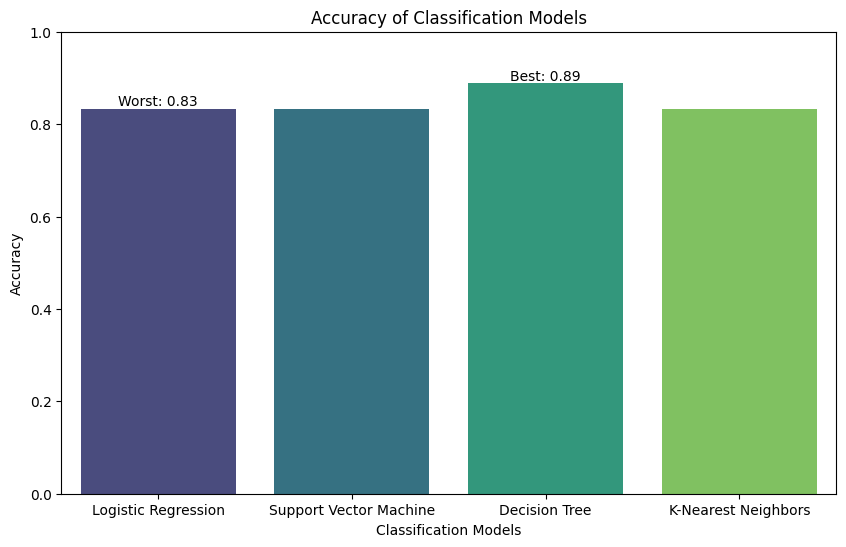

In [239]:
# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Model', y='Accuracy', palette='viridis')

# Annotate the best and worst accuracy values
best_accuracy = df['Accuracy'].max()
worst_accuracy = df['Accuracy'].min()

plt.text(df[df['Accuracy'] == best_accuracy].index[0], best_accuracy, f'Best: {best_accuracy:.2f}', 
         ha='center', va='bottom', fontsize=10)
plt.text(df[df['Accuracy'] == worst_accuracy].index[0], worst_accuracy, f'Worst: {worst_accuracy:.2f}', 
         ha='center', va='bottom', fontsize=10)

plt.title('Accuracy of Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy score
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
